https://dspy.ai/tutorials/image_generation_prompting/

pip install fal-client pillow 
#dotenv

In [14]:
import dspy

from PIL import Image
from io import BytesIO
import requests
import fal_client

from dotenv import load_dotenv
load_dotenv()

# import display
from IPython.display import display

lm = dspy.LM(model="gpt-4o-mini", temperature=0.5)
# lm = dspy.LM('ollama_chat/llava-llama3', api_base='http://localhost:11434', api_key='')
dspy.settings.configure(lm=lm)

In [15]:
def generate_image(prompt):

    request_id = fal_client.submit(
        "fal-ai/flux-pro/v1.1-ultra",
        arguments={
            "prompt": prompt
        },
    ).request_id

    result = fal_client.result("fal-ai/flux-pro/v1.1-ultra", request_id)
    url = result["images"][0]["url"]

    return dspy.Image.from_url(url)

def display_image(image):
    url = image.url
    # download the image
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))

    # display at 25% of original size
    display(image.resize((image.width // 4, image.height // 4)))


Iteration 1 of 5


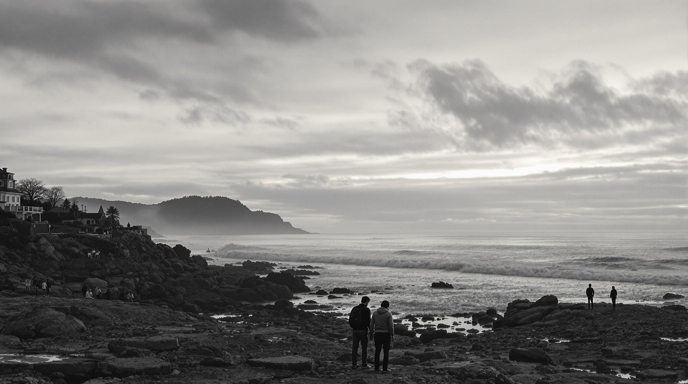

Feedback: The image effectively captures a peaceful coastal scene, with gentle waves and a serene atmosphere. However, the tension aspect is less evident, as the overall mood appears calm and tranquil, lacking any elements that would suggest tension.
Revised prompt: A scene that conveys a sense of calm with underlying tension, perhaps through contrasting elements like stormy skies or distant figures.
Iteration 2 of 5


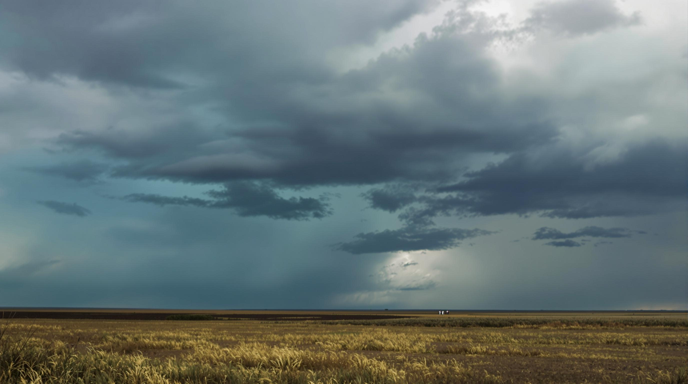

Final prompt: A scene that conveys a sense of calm with underlying tension, perhaps through contrasting elements like stormy skies or distant figures.


In [16]:
check_and_revise_prompt = dspy.Predict("desired_prompt: str, current_image: dspy.Image, current_prompt:str -> feedback:str, image_strictly_matches_desired_prompt: bool, revised_prompt: str")

initial_prompt = "A scene that's both peaceful and tense"
current_prompt = initial_prompt

max_iter = 5
for i in range(max_iter):
    print(f"Iteration {i+1} of {max_iter}")
    current_image = generate_image(current_prompt)
    result = check_and_revise_prompt(desired_prompt=initial_prompt, current_image=current_image, current_prompt=current_prompt)
    display_image(current_image)
    if result.image_strictly_matches_desired_prompt:
        break
    else:
        current_prompt = result.revised_prompt
        print(f"Feedback: {result.feedback}")
        print(f"Revised prompt: {result.revised_prompt}")

print(f"Final prompt: {current_prompt}")


In [17]:
lm.inspect_history(n=4)





[2025-02-19T23:41:21.570793]

System message:

Your input fields are:
1. `desired_prompt` (str)
2. `current_image` (Image)
3. `current_prompt` (str)

Your output fields are:
1. `feedback` (str)
2. `image_strictly_matches_desired_prompt` (bool)
3. `revised_prompt` (str)

All interactions will be structured in the following way, with the appropriate values filled in.

[[ ## desired_prompt ## ]]
{desired_prompt}

[[ ## current_image ## ]]
{current_image}

[[ ## current_prompt ## ]]
{current_prompt}

[[ ## feedback ## ]]
{feedback}

[[ ## image_strictly_matches_desired_prompt ## ]]
{image_strictly_matches_desired_prompt}        # note: the value you produce must be True or False

[[ ## revised_prompt ## ]]
{revised_prompt}

[[ ## completed ## ]]

In adhering to this structure, your objective is: 
        Given the fields `desired_prompt`, `current_image`, `current_prompt`, produce the fields `feedback`, `image_strictly_matches_desired_prompt`, `revised_prompt`.


User message:

[[ ## d

https://fal.media/files/zebra/4x6CRXVy9nqIM77dThd00_147bb650b9424bc99b8c70f20d0043df.jpg
https://fal.media/files/monkey/vbc31AGvqvDnCRgwlDz9c_e995f96dfb0346f69f87466ec2ddd689.jpg